# Kelly Criterion  

Discrete event simulator for Kelly.

https://www.investopedia.com/terms/k/kellycriterion.asp

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
def game(wager, odds=0.5, payout=1.0):
    if rand() < odds:
        return payout * wager
    else:
        return -wager

In [22]:
def play(wager, odds=0.5, payout=1.0, bankroll=100, count=10, game=game, wager_rate=None):
    for j in range(count):
        if bankroll <= 0:
            return 0
        if wager_rate is not None:
            wager = wager_rate * bankroll
        bankroll += game(wager=min(bankroll, wager), payout=payout, odds=odds)
    return bankroll

In [29]:
def sim(wager, odds=0.5, payout=1.0, iterations=100000, bankroll=100, count=10, game=game, wager_rate=None):
    return array([play(wager, payout=payout, odds=odds, bankroll=bankroll, count=count, game=game, wager_rate=wager_rate) for j in range(iterations)])

Text(0, 0.5, 'median outcome')

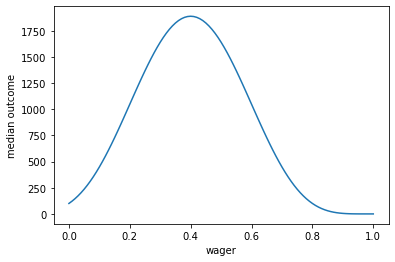

In [30]:
wagers = linspace(0,1,101)
medians, means, stds = zip(*[(median(sims), mean(sims), std(sims)) for sims in (sim(wager=None, wager_rate=wager, odds=.50, payout=5, iterations=10000, count=10) for wager in wagers)])
means=array(means)
stds=array(stds)
plot(wagers, medians)
xlabel('wager')
ylabel('median outcome')

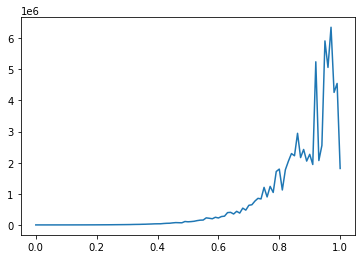

In [32]:
plot(wagers, means)

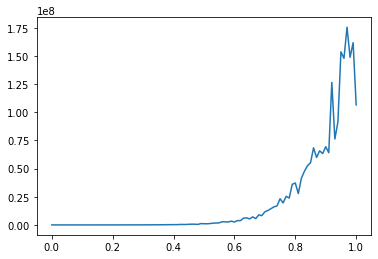

In [33]:
plot(wagers, means+stds)

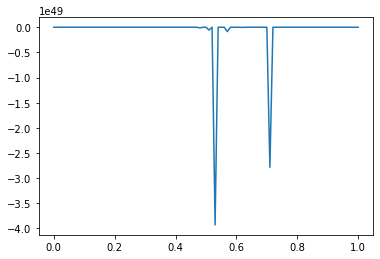

In [20]:
plot(wagers, means-stds)

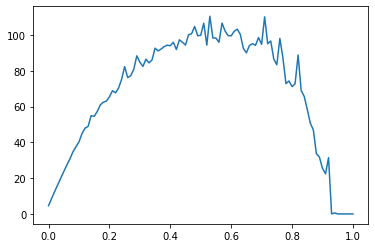

In [21]:
plot(wagers, log1p(means))

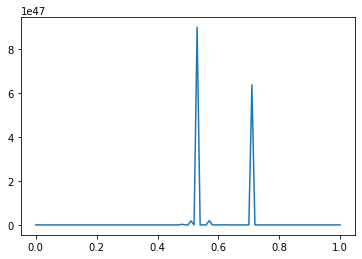

In [24]:
plot(wagers, means)

In [48]:
runs = sim(wager=None, wager_rate=.4, odds=.50, payout=5, iterations=10000, count=10)

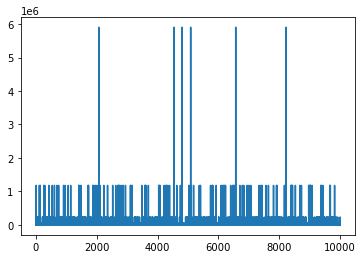

In [49]:
plot(runs)

In [41]:
runs

array([47239.2   ,   377.9136,  1889.568 , ...,   377.9136,  9447.84  ,
         377.9136])